# import requests, zipfile, io
# url = "https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetb2d9982.zip"
# response = requests.get(url)
# with zipfile.ZipFile(io.BytesIO(response.content)) as z:
#     z.extractall("/afs/glue.umd.edu/home/glue/k/b/kbodla/home/MSML602_Final_Project")

In [1]:
import pandas as pd
df = pd.read_csv('dataset/train.csv')
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [3]:
df.isnull().sum()

PRODUCT_ID               0
TITLE                   13
BULLET_POINTS       837366
DESCRIPTION        1157382
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [5]:
df[(df['DESCRIPTION'].isna() | (df['DESCRIPTION'] == '')) & 
   (df['BULLET_POINTS'].isna() | (df['BULLET_POINTS'] == ''))]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424
6,413758,Ungifted: My Life and Journey,NaN,NaN,23,598.000
11,833712,La Mure / Valbonnais gps,NaN,NaN,1,433.070
12,648364,J'ecris des lettres! premiers exercices d'écri...,NaN,NaN,1,759.841
13,1991694,Mediterranean diet for beginners: 7Benefits of...,NaN,NaN,32,600.000
...,...,...,...,...,...,...
2249679,111250,When Work Becomes Optional,NaN,NaN,87,600.000
2249681,421168,Learning to Swim,NaN,NaN,12743,525.000
2249682,38572,"Holy Bible: New International Version, Camel/c...",NaN,NaN,129,488.188
2249691,571566,Comedy Wildlife Photography Awards: The perfec...,NaN,NaN,2968,271.250


Here from the above we can see that, title has only 13 values from 2miilion rows , we can simply remove Nan's from TITLE column and use title as the only feature column, but we would loss information from decsription and bullet points column, so we can choose combinations of them like title+bullet points, title+description ,bullet points+description but for the case of bullet points +description we ca observe approximately 783500 rows being null or empty simultanoeusly so a clever option would concatinating all the title+description+bullet points as this would prevent loss of rows due to null and empty values

In [6]:
df[(df['DESCRIPTION'].isna() | (df['DESCRIPTION'] == '')) & 
   (df['BULLET_POINTS'].isna() | (df['BULLET_POINTS'] == ''))&
(df['TITLE'].isna() | (df['TITLE'] == ''))]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
66157,1804,NaN,NaN,NaN,222,507.873
196485,164542,NaN,NaN,NaN,150,575.000
420890,16935,NaN,NaN,NaN,6104,290.000
948754,566503,NaN,NaN,NaN,109,555.117
1144461,678966,NaN,NaN,NaN,1,685.038
1364032,548186,NaN,NaN,NaN,1,1228.344
1716822,20369,NaN,NaN,NaN,154,1040.000
1879925,496531,NaN,NaN,NaN,1,799.211
1885213,555363,NaN,NaN,NaN,151,846.455
2108453,113675,NaN,NaN,NaN,6044,600.000


as we can see with the new feature of title+bullet points+description we have only 12 simultanoeus missing values, we can remove effortlessly as the sample size is huge

In [10]:
print(df['PRODUCT_TYPE_ID'].nunique())
print(df['PRODUCT_ID'].nunique())
len(df)

12907
2249698


2249698

we can see that the len of dataset and unique values in prodcut_id are same ,meaning they are all independent products ,but there are 12907 unique values from prodcut_type_id, a assumption can be prodcut_type_id can indicate a particular category for e.g:book, but prodcut_id could be unique thing in the category for e,g:sherlock homes book and cooking book comes under the category books but both of the are different, this brings to our next step checking lenght statistics for each prodcut type_id

In [13]:
import matplotlib.pyplot as plt


stats = df.groupby('PRODUCT_TYPE_ID')['PRODUCT_LENGTH'].agg(['mean', 'median']).reset_index()

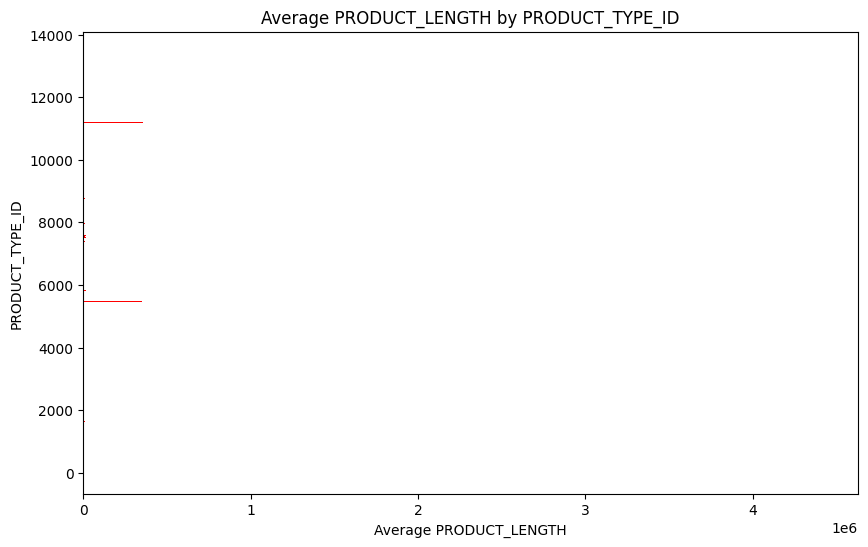

In [21]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['mean'], color='red')
plt.xlabel('Average PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Average PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()

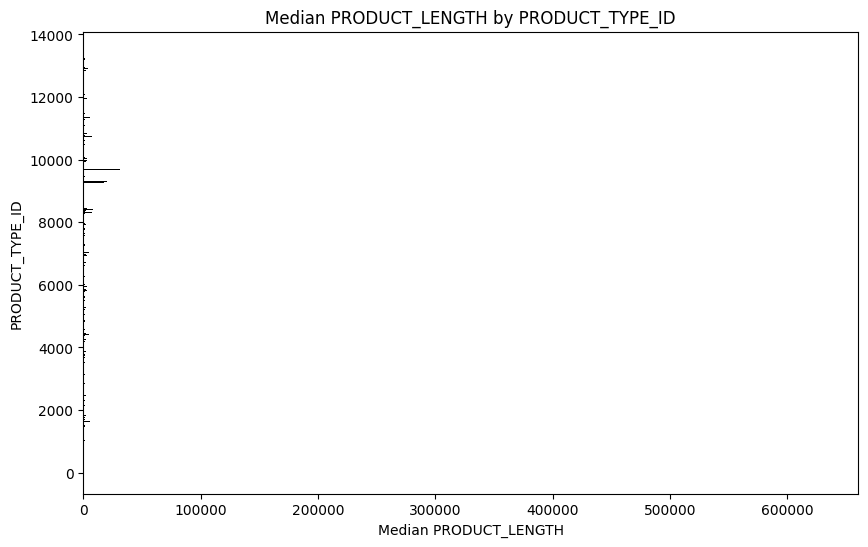

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['median'], color='black')
plt.xlabel('Median PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Median PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()

the above plots are not interpretable lets change the scale to log scale to plot the distributions

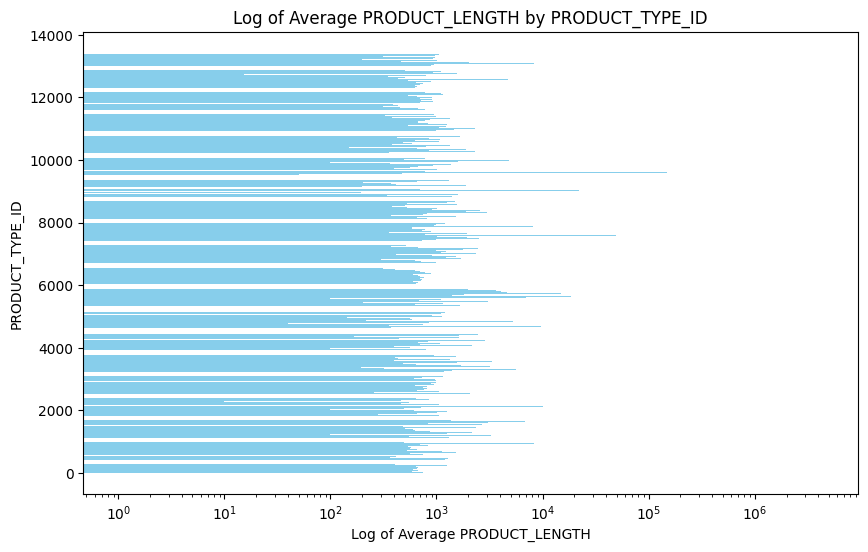

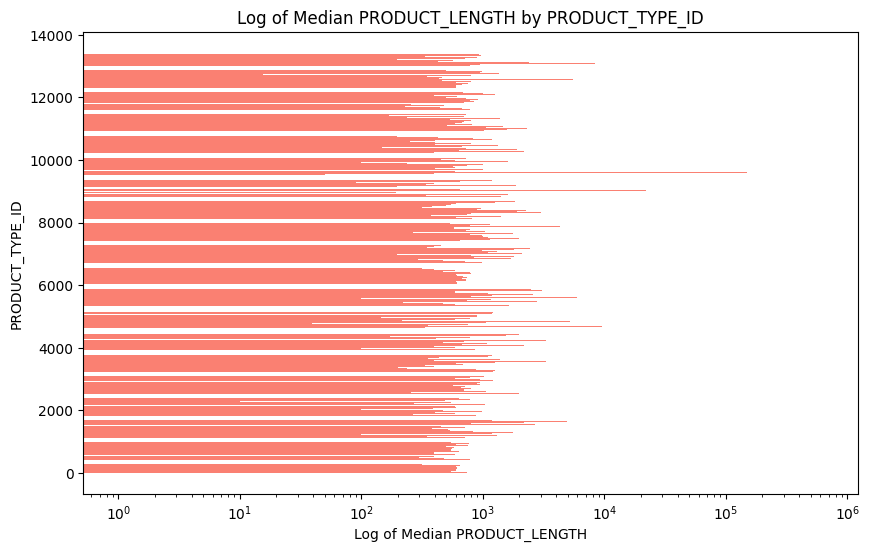

In [23]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['mean'], color='skyblue')
plt.xscale('log') 
plt.xlabel('Log of Average PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Log of Average PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()


plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['median'], color='salmon')
plt.xscale('log')  
plt.xlabel('Log of Median PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Log of Median PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()


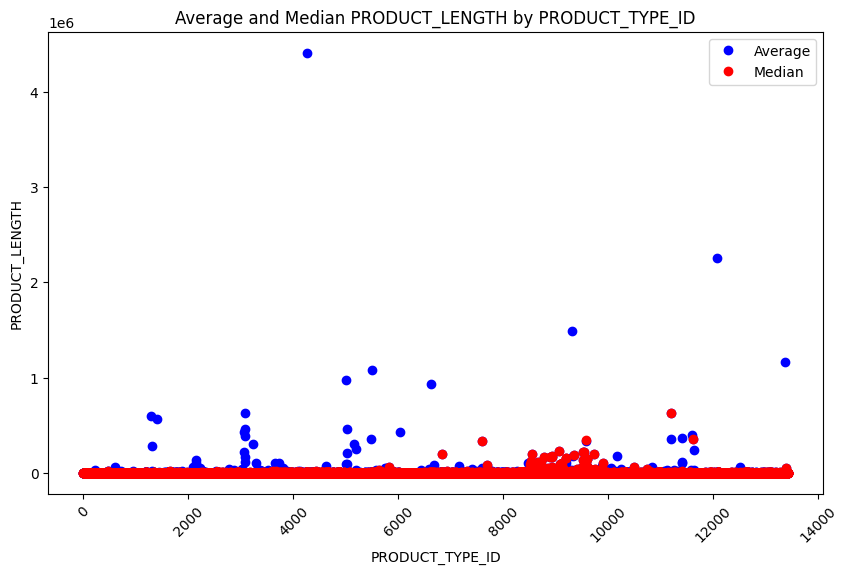

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(stats['PRODUCT_TYPE_ID'], stats['mean'], 'bo', label='Average')
plt.plot(stats['PRODUCT_TYPE_ID'], stats['median'], 'ro', label='Median')
plt.xlabel('PRODUCT_TYPE_ID')
plt.ylabel('PRODUCT_LENGTH')
plt.title('Average and Median PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.legend()
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_4056200/2824061129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=stats['mean'], palette='Set2')
/tmp/ipykernel_4056200/2824061129.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stats['mean'], log_scale=True, shade=True, color='skyblue')
/tmp/ipykernel_4056200/2824061129.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=stats['median'], palette='Set2')
/tmp/ipykernel_4056200/2824061129.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update y

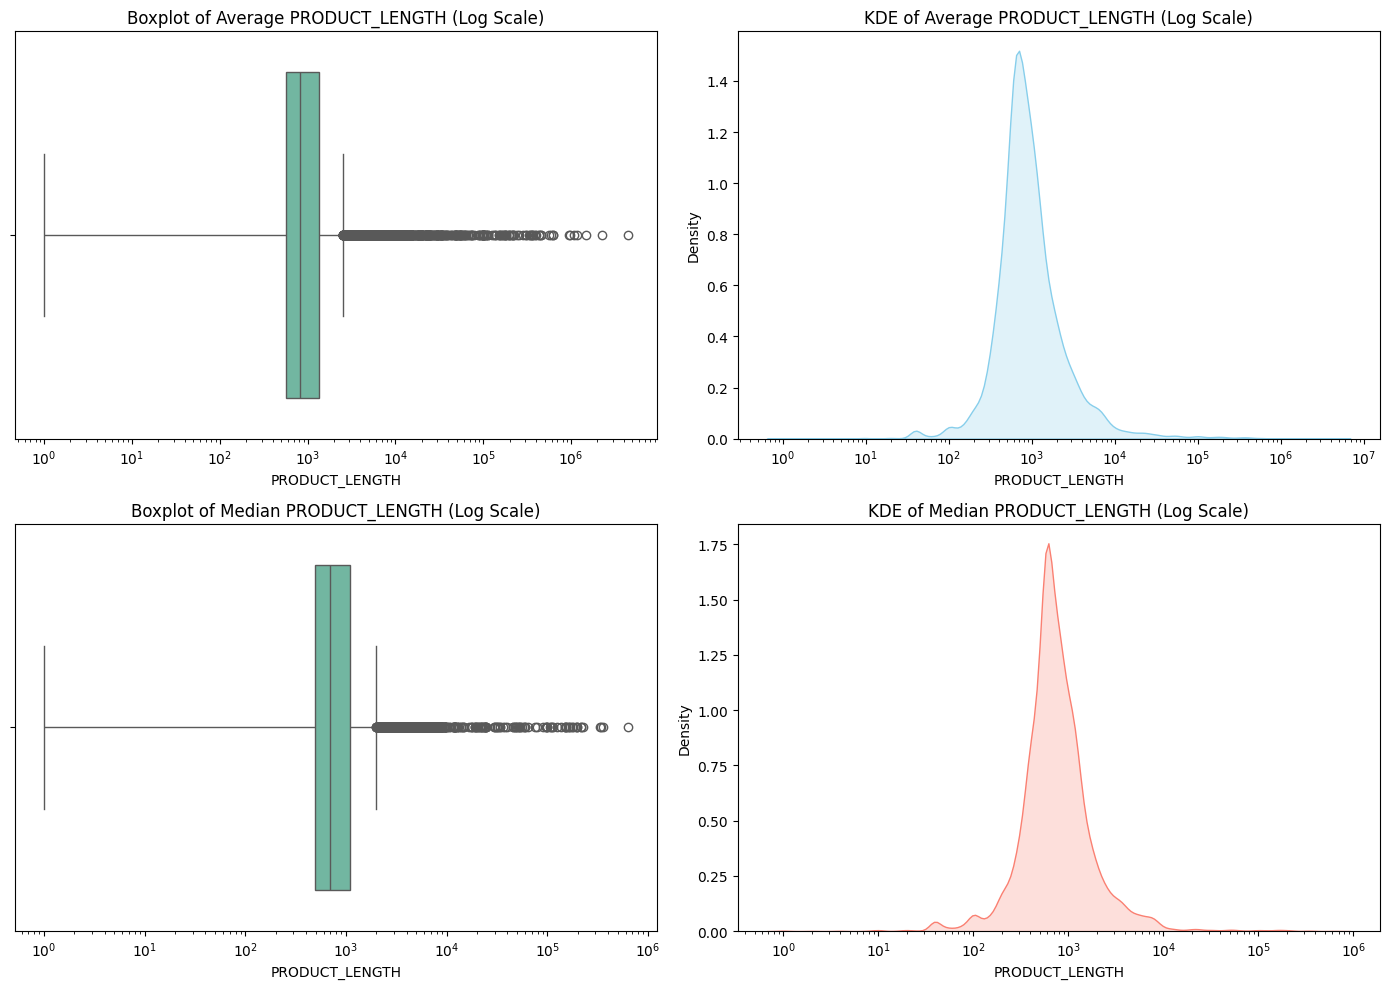

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
sns.boxplot(x=stats['mean'], palette='Set2')
plt.xscale('log') 
plt.xlabel('PRODUCT_LENGTH')
plt.title('Boxplot of Average PRODUCT_LENGTH (Log Scale)')


plt.subplot(2, 2, 2)
sns.kdeplot(stats['mean'], log_scale=True, shade=True, color='skyblue')
plt.xlabel('PRODUCT_LENGTH')
plt.ylabel('Density')
plt.title('KDE of Average PRODUCT_LENGTH (Log Scale)')


plt.subplot(2, 2, 3)
sns.boxplot(x=stats['median'], palette='Set2')
plt.xscale('log')  
plt.xlabel('PRODUCT_LENGTH')
plt.title('Boxplot of Median PRODUCT_LENGTH (Log Scale)')


plt.subplot(2, 2, 4)
sns.kdeplot(stats['median'], log_scale=True, shade=True, color='salmon')
plt.xlabel('PRODUCT_LENGTH')
plt.ylabel('Density')
plt.title('KDE of Median PRODUCT_LENGTH (Log Scale)')


plt.tight_layout()
plt.show()


we can see that both the avg and median for each prodcut_type have similar distribution, all the above data plots are sampled for each prodcut type to show variations in them

as we are done with EDA , the next would text processing one way to capture information from text is tf-idf but it insignificant, another option could be using word2vec one disadvantgae for that is the word vectors are computed meaning the word vectors are not computed according to the meaning and its placement in the sentence, another appraoch is using sentence trasnformers its advantgae over the previous models is that it computes word vector based on its meaning and placement in the sentence.for e.g:the bank was crowded,the riverside bank was crowded.

here for the word bank word2vec would output same representation in both sentences,but in sentence transformers the bank is represented based on its meaning and position in the sentence.